# Introduction

Three groups: microsatellite instability high (MSI-H), microsatellite instability low (MSI-L) and microsatellite stable (MSS).

Two sets of measurements: 7_marker, 5_marker. The original report consider one sample as MSI if both indicate positive.

In [51]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

mpl.rcParams['figure.dpi'] = 600

In [2]:
df = pd.read_excel("MSIsensor_supplymentaryS1_nov27.xlsx", index=1)
df

,TCGA_ID,BAT40,TGFBII,BAT26,BAT25,D17S250,D5S346,D2S123,Penta_D,Penta_E,7_marker,5_marker,#with_data,#somatic_MSI,MSIsensor,#somatic,annotation
0,TCGA-B5-A11H,1,4,1,1,3,3,2,2,6,MSI-H,MSI-H,11175,4541,40.64,1017,NaN
1,TCGA-AP-A0LT,1,4,1,1,1,2,1,2,6,MSI-H,MSI-H,10348,3925,37.93,664,NaN
2,TCGA-AX-A060,1,1,1,1,2,2,3,6,6,MSI-H,MSI-H,10802,4066,37.64,697,NaN
3,TCGA-A5-A0GB,1,4,1,1,2,2,1,2,6,MSI-H,MSI-H,11591,4316,37.24,714,NaN
4,TCGA-AX-A063,1,4,1,1,1,2,2,6,2,MSI-H,MSI-H,10260,3603,35.12,986,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,TCGA-BS-A0V7,4,4,4,4,6,6,6,6,6,MSS,MSS,11366,0,0.00,42,NaN
238,TCGA-D1-A165,4,4,4,4,6,6,6,4,6,MSS,MSS,8912,0,0.00,65,NaN
239,TCGA-D1-A16G,4,4,4,4,6,4,5,6,5,MSS,MSS,8870,0,0.00,37,NaN
240,TCGA-D1-A16X,4,4,4,6,6,6,4,6,4,MSS,MSS,8566,0,0.00,2250,NaN


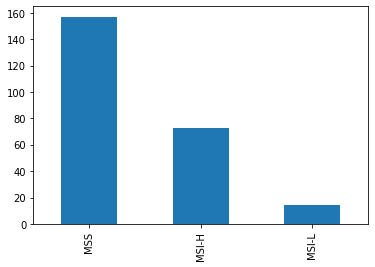

In [4]:
display(df['7_marker'].value_counts().plot(kind="bar"))

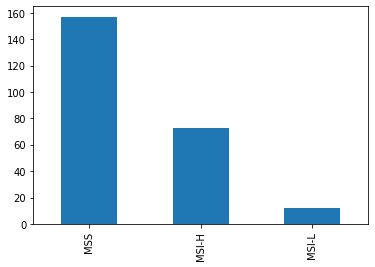

In [5]:
display(df['5_marker'].value_counts().plot(kind="bar"))

In [26]:
f = lambda x: x[0:3]
msi_mask = (df['7_marker'].apply(f) == 'MSI') & (df['5_marker'].apply(f) == 'MSI')
msi_patient_id = df.TCGA_ID[msi_mask].to_frame()
mss_patient_id = df.TCGA_ID[~msi_mask].to_frame()

msi_patient_id['microsatellite'] = 'MSI'
mss_patient_id['microsatellite'] = 'MSS'

microsatellite_label_df = msi_patient_id.append(mss_patient_id)

In [11]:
data = pd.read_csv("TCGA.Kallisto.fullIDs.cibersort.relative.tsv", sep="\t")
data["SampleID"] = data["SampleID"].apply(lambda x: x.replace('.', '-'))
data["PatientID"] = data["SampleID"].apply(lambda x: '-'.join(x.split('-')[0:3]))

In [27]:
merged = data.merge(microsatellite_label_df, left_on="PatientID", right_on="TCGA_ID")

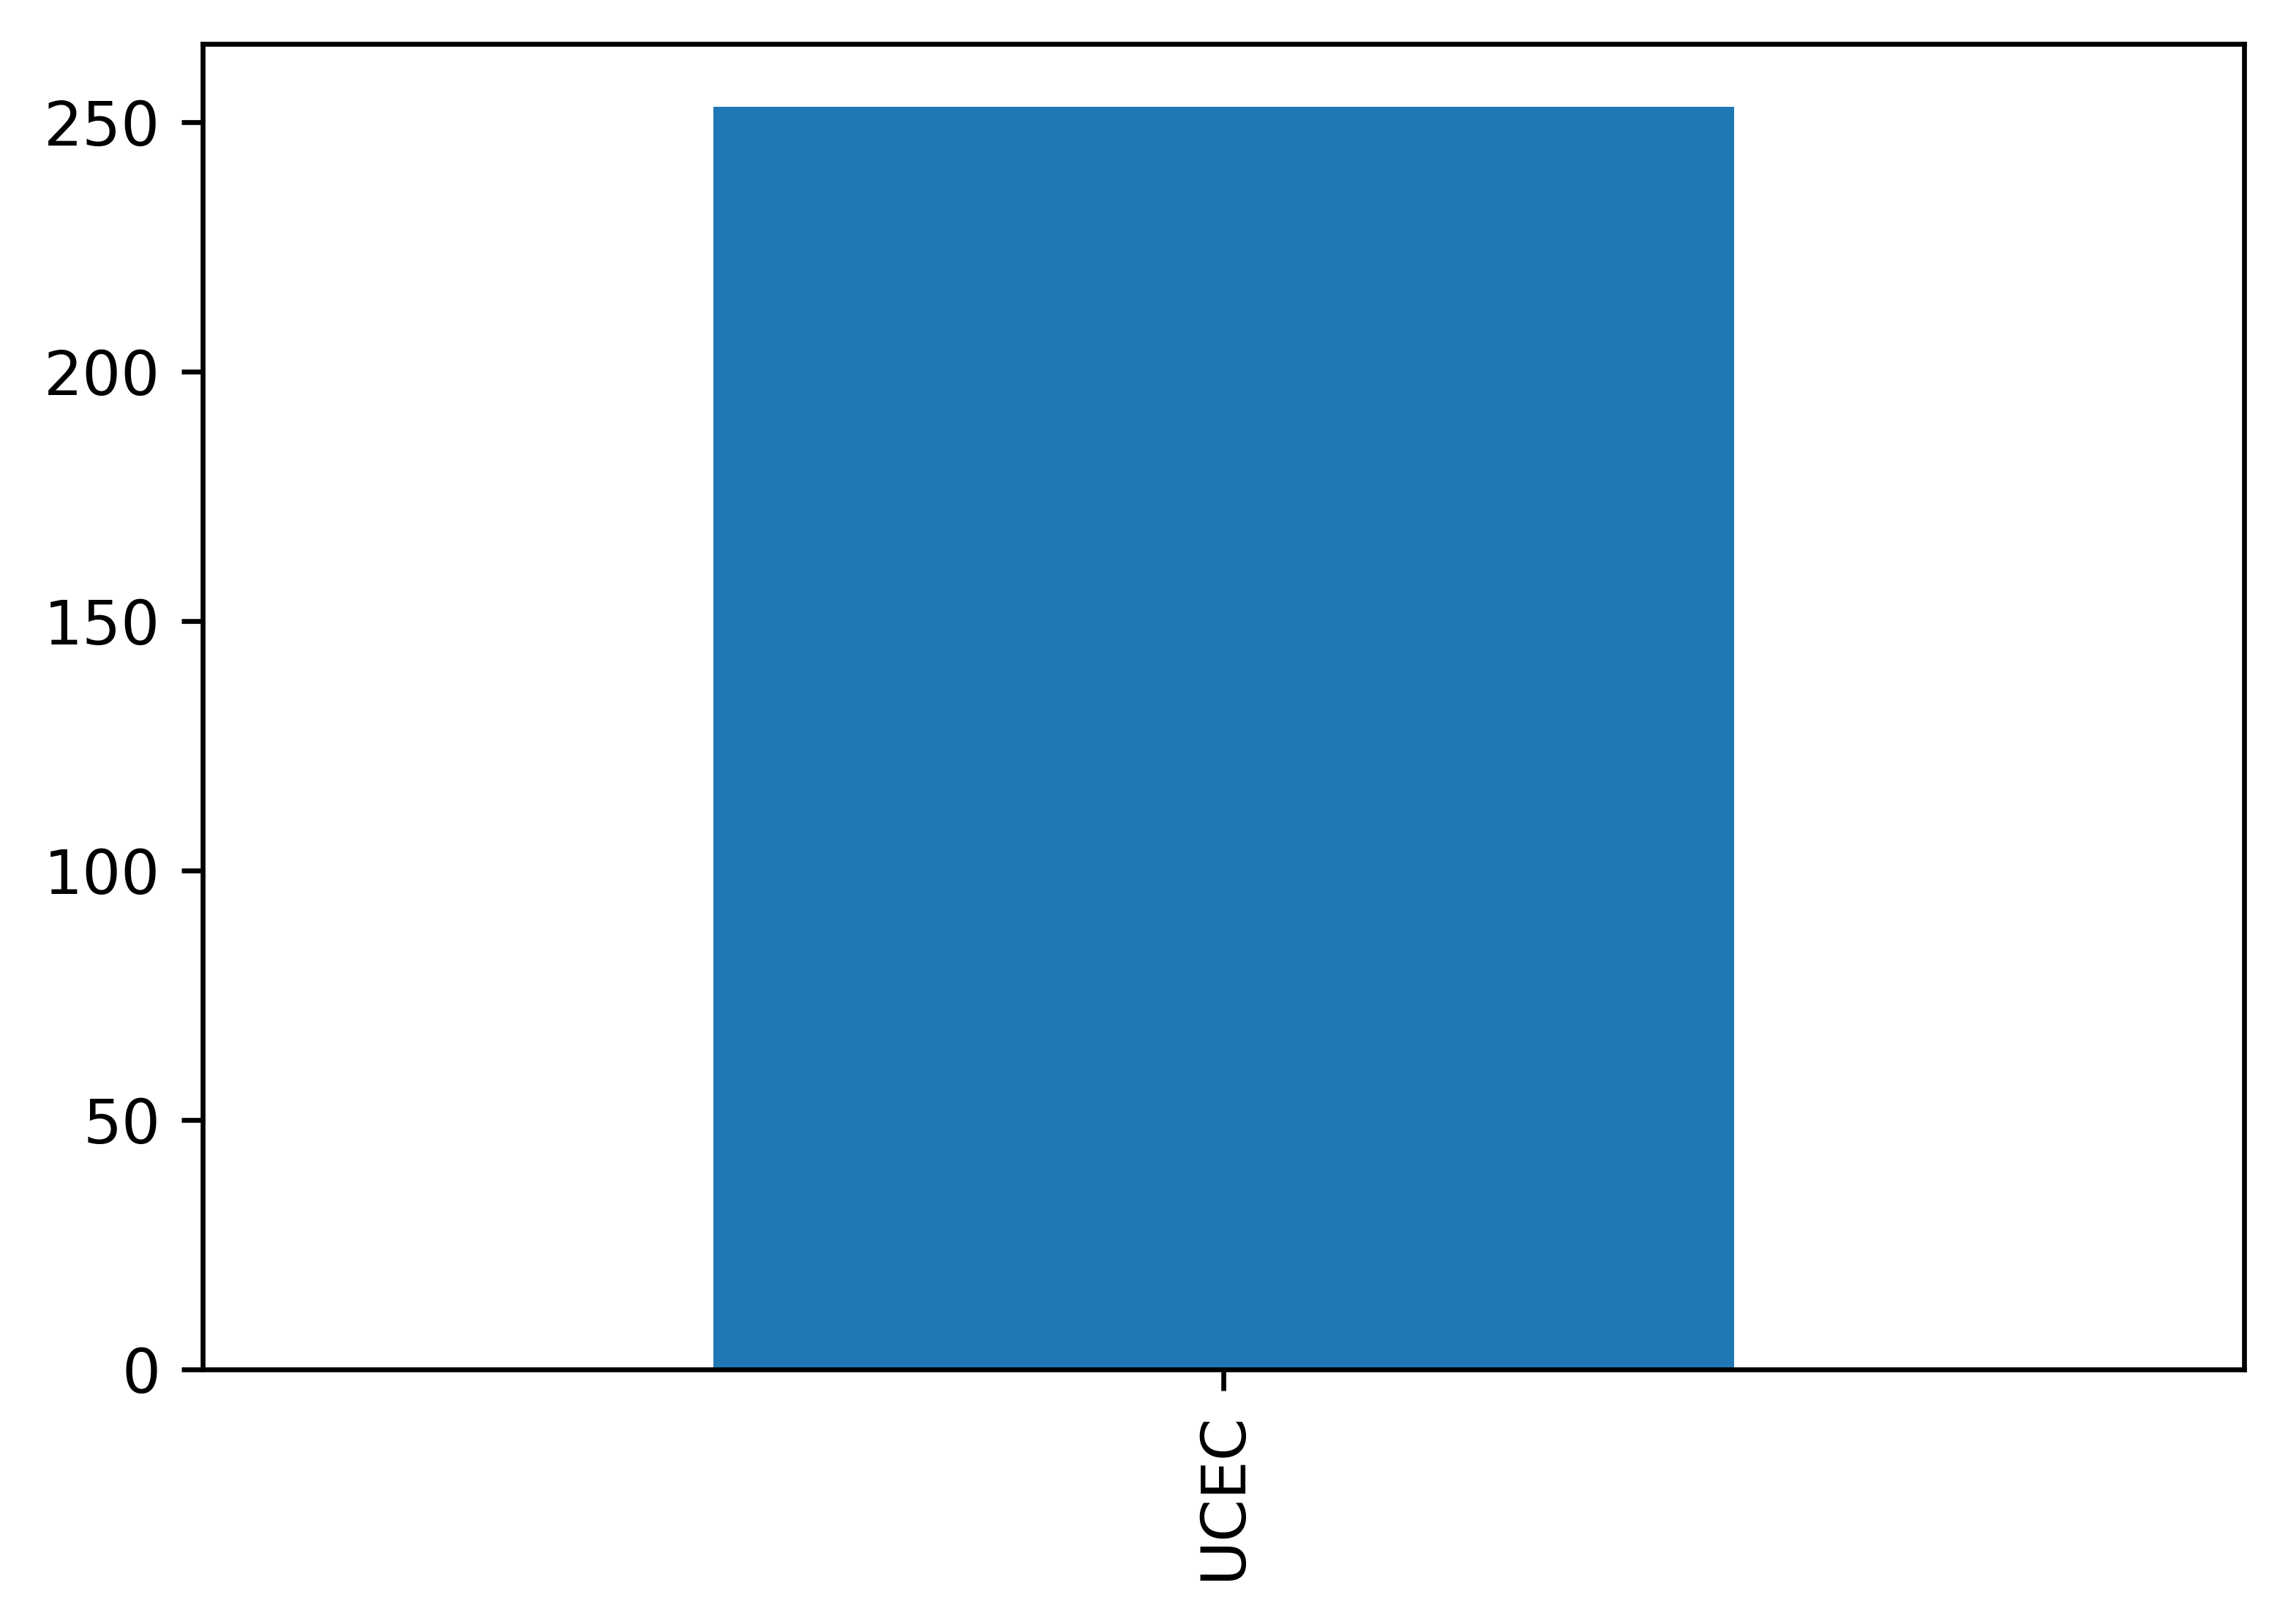

In [53]:
merged.CancerType.value_counts().plot(kind="bar")

In [ ]:
merged.microsatellite.value_counts().plot(kind="bar")

In [44]:
cell_types = ['B.cells.naive', 'B.cells.memory', 'Plasma.cells', 'T.cells.CD8',
       'T.cells.CD4.naive', 'T.cells.CD4.memory.resting',
       'T.cells.CD4.memory.activated', 'T.cells.follicular.helper',
       'T.cells.regulatory..Tregs.', 'T.cells.gamma.delta', 'NK.cells.resting',
       'NK.cells.activated', 'Monocytes', 'Macrophages.M0', 'Macrophages.M1',
       'Macrophages.M2', 'Dendritic.cells.resting',
       'Dendritic.cells.activated', 'Mast.cells.resting',
       'Mast.cells.activated', 'Eosinophils', 'Neutrophils']

#merged['Leukocytes.all'] = merged[cell_types].sum(1)

merged['T.cells.all'] = merged[['T.cells.CD8',
                                    'T.cells.CD4.naive',
                                    'T.cells.CD4.memory.resting',
                                    'T.cells.CD4.memory.activated',
                                    'T.cells.follicular.helper',
                                    'T.cells.regulatory..Tregs.',
                                    'T.cells.gamma.delta']].sum(1)

merged['B.cells.all'] = merged[['B.cells.naive', 'B.cells.memory']].sum(1)

merged['Nk.cells.all'] = merged[['NK.cells.resting', 'NK.cells.activated']].sum(1)

merged['Macrophages.all'] = merged[['Macrophages.M0', 'Macrophages.M1', 'Macrophages.M2']].sum(1)

merged['Dendritic.cells.all'] = merged[['Dendritic.cells.resting', 'Dendritic.cells.activated']].sum(1)

merged['Mast.cells.all'] = merged[['Mast.cells.resting', 'Mast.cells.activated']].sum(1)



augmented_cell_types = cell_types + ['T.cells.all', 'B.cells.all', 'Nk.cells.all', 'Macrophages.all', 
                                     'Dendritic.cells.all', 'Mast.cells.all']

merged

,SampleID,CancerType,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,T.cells.CD4.memory.activated,T.cells.follicular.helper,...,RMSE,PatientID,TCGA_ID,microsatellite,T.cells.all,B.cells.all,Nk.cells.all,Macrophages.all,Dendritic.cells.all,Mast.cells.all
0,TCGA-BK-A139-02A-11R-A27V-07,UCEC,0.000000,0.000000,0.032009,0.012209,0.0,0.191615,0.000000,0.083235,...,1.035502,TCGA-BK-A139,TCGA-BK-A139,MSS,0.287059,0.000000,0.092681,0.446367,0.037491,0.090996
1,TCGA-BK-A139-01A-11R-A118-07,UCEC,0.076440,0.000000,0.027859,0.085577,0.0,0.123628,0.000000,0.077232,...,1.008712,TCGA-BK-A139,TCGA-BK-A139,MSS,0.325572,0.076440,0.029372,0.473724,0.000000,0.033379
2,TCGA-BK-A139-01A-11R-A277-07,UCEC,0.000000,0.061191,0.000000,0.093501,0.0,0.307627,0.000000,0.011619,...,1.027160,TCGA-BK-A139,TCGA-BK-A139,MSS,0.412746,0.061191,0.000000,0.446580,0.020580,0.020577
3,TCGA-BK-A139-01C-08R-A277-07,UCEC,0.035196,0.000000,0.000000,0.029885,0.0,0.274475,0.000000,0.000000,...,1.043543,TCGA-BK-A139,TCGA-BK-A139,MSS,0.304360,0.035196,0.025348,0.354862,0.082169,0.080316
4,TCGA-AX-A05Y-11A-11R-A27V-07,UCEC,0.056406,0.000000,0.000000,0.172399,0.0,0.127321,0.000000,0.024955,...,1.040578,TCGA-AX-A05Y,TCGA-AX-A05Y,MSI,0.327653,0.056406,0.040311,0.255944,0.001602,0.270547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,TCGA-BS-A0V7-01A-21R-A118-07,UCEC,0.000000,0.129441,0.112427,0.166960,0.0,0.066348,0.007972,0.108577,...,0.936339,TCGA-BS-A0V7,TCGA-BS-A0V7,MSS,0.419743,0.129441,0.108339,0.103794,0.014908,0.081979
249,TCGA-B5-A0K9-01A-21R-A104-07,UCEC,0.067443,0.000000,0.053966,0.078057,0.0,0.179279,0.000000,0.060800,...,1.019005,TCGA-B5-A0K9,TCGA-B5-A0K9,MSI,0.374907,0.067443,0.037103,0.403951,0.000318,0.043053
250,TCGA-B5-A0JN-01A-11R-A104-07,UCEC,0.004600,0.040677,0.123451,0.092738,0.0,0.045751,0.038190,0.064256,...,1.026697,TCGA-B5-A0JN,TCGA-B5-A0JN,MSI,0.240935,0.045277,0.221111,0.279445,0.059759,0.000000
251,TCGA-AX-A05W-01A-21R-A466-07,UCEC,0.000000,0.040819,0.064845,0.044067,0.0,0.000000,0.000000,0.099914,...,1.039303,TCGA-AX-A05W,TCGA-AX-A05W,MSS,0.203878,0.040819,0.057920,0.596773,0.000000,0.005239


In [45]:
mss = merged[merged.microsatellite == 'MSS'][augmented_cell_types]
msi = merged[merged.microsatellite == 'MSI'][augmented_cell_types]

In [46]:
mss

,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,T.cells.CD4.memory.activated,T.cells.follicular.helper,T.cells.regulatory..Tregs.,T.cells.gamma.delta,...,Mast.cells.resting,Mast.cells.activated,Eosinophils,Neutrophils,T.cells.all,B.cells.all,Nk.cells.all,Macrophages.all,Dendritic.cells.all,Mast.cells.all
0,0.000000,0.000000,0.032009,0.012209,0.000000,0.191615,0.000000,0.083235,0.000000,0.000000,...,0.000000,0.090996,0.0,0.000000,0.287059,0.000000,0.092681,0.446367,0.037491,0.090996
1,0.076440,0.000000,0.027859,0.085577,0.000000,0.123628,0.000000,0.077232,0.039135,0.000000,...,0.000000,0.033379,0.0,0.029615,0.325572,0.076440,0.029372,0.473724,0.000000,0.033379
2,0.000000,0.061191,0.000000,0.093501,0.000000,0.307627,0.000000,0.011619,0.000000,0.000000,...,0.020577,0.000000,0.0,0.022343,0.412746,0.061191,0.000000,0.446580,0.020580,0.020577
3,0.035196,0.000000,0.000000,0.029885,0.000000,0.274475,0.000000,0.000000,0.000000,0.000000,...,0.080316,0.000000,0.0,0.113117,0.304360,0.035196,0.025348,0.354862,0.082169,0.080316
6,0.000000,0.225937,0.025331,0.008925,0.032567,0.000000,0.000000,0.055045,0.031553,0.000000,...,0.000000,0.054330,0.0,0.000000,0.128090,0.225937,0.102180,0.435513,0.006000,0.054330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000000,0.138408,0.097627,0.295527,0.000000,0.000000,0.002916,0.184083,0.019634,0.008314,...,0.038759,0.000000,0.0,0.007567,0.510473,0.138408,0.083786,0.116644,0.006737,0.038759
246,0.000000,0.051112,0.156883,0.187763,0.000000,0.171614,0.000000,0.069134,0.065986,0.000000,...,0.000000,0.000000,0.0,0.000000,0.494497,0.051112,0.082891,0.184484,0.015896,0.000000
247,0.173139,0.000000,0.172988,0.153544,0.000000,0.000000,0.000000,0.186892,0.008122,0.000000,...,0.000000,0.000000,0.0,0.000000,0.348558,0.173139,0.084250,0.205106,0.010491,0.000000
248,0.000000,0.129441,0.112427,0.166960,0.000000,0.066348,0.007972,0.108577,0.069886,0.000000,...,0.081979,0.000000,0.0,0.000285,0.419743,0.129441,0.108339,0.103794,0.014908,0.081979


# Results

## MSS

In [47]:
a = 0.05

sanitize = lambda x: 0.0 if x < 0 else 1.0 if x > 1 else x

res_mss = pd.DataFrame(index = cell_types, columns = ['mean', 'mean lower', 'mean upper', 'sd', 'sd lower', 'sd upper'])

n = mss.shape[0];

# Mean
res_mss['mean'] = mss.mean(axis=0)

res_mss['sd'] = mss.std(ddof=1, axis=0)
        
# Mean CI
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * res_mss['sd'] / np.sqrt(n)
res_mss['mean lower'] = (res_mss['mean'] - err).apply(sanitize)
res_mss['mean upper'] = (res_mss['mean'] + err).apply(sanitize)
        
# Standard deviation CI
res_mss['sd lower'] = np.sqrt((n - 1) * res_mss['sd'] ** 2 / scipy.stats.chi2.ppf(1 - a / 2, n - 1))
res_mss['sd upper'] = np.sqrt((n - 1) * res_mss['sd'] ** 2 / scipy.stats.chi2.ppf(a / 2, n - 1))

res_mss

,mean,mean lower,mean upper,sd,sd lower,sd upper
B.cells.naive,0.042914,0.033788,0.052040,0.059732,0.053939,0.066929
B.cells.memory,0.034144,0.025836,0.042453,0.054382,0.049108,0.060934
Plasma.cells,0.058489,0.050498,0.066480,0.052304,0.047232,0.058606
T.cells.CD8,0.121644,0.109757,0.133531,0.077806,0.070260,0.087181
T.cells.CD4.naive,0.003089,0.001031,0.005147,0.013472,0.012166,0.015095
T.cells.CD4.memory.resting,0.083811,0.071952,0.095670,0.077622,0.070095,0.086975
T.cells.CD4.memory.activated,0.001270,0.000386,0.002155,0.005789,0.005228,0.006487
T.cells.follicular.helper,0.090878,0.081390,0.100367,0.062105,0.056083,0.069589
T.cells.regulatory..Tregs.,0.072353,0.064281,0.080426,0.052839,0.047715,0.059206
T.cells.gamma.delta,0.002799,0.000722,0.004877,0.013599,0.012280,0.015237


## MSI

In [48]:
a = 0.05

sanitize = lambda x: 0.0 if x < 0 else 1.0 if x > 1 else x

res_msi = pd.DataFrame(index = cell_types, columns = ['mean', 'mean lower', 'mean upper', 'sd', 'sd lower', 'sd upper'])

n = msi.shape[0];

# Mean
res_msi['mean'] = msi.mean(axis=0)

res_msi['sd'] = msi.std(ddof=1, axis=0)
        
# Mean CI
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * res_msi['sd'] / np.sqrt(n)
res_msi['mean lower'] = (res_msi['mean'] - err).apply(sanitize)
res_msi['mean upper'] = (res_msi['mean'] + err).apply(sanitize)
        
# Standard deviation CI
res_msi['sd lower'] = np.sqrt((n - 1) * res_msi['sd'] ** 2 / scipy.stats.chi2.ppf(1 - a / 2, n - 1))
res_msi['sd upper'] = np.sqrt((n - 1) * res_msi['sd'] ** 2 / scipy.stats.chi2.ppf(a / 2, n - 1))

res_msi

,mean,mean lower,mean upper,sd,sd lower,sd upper
B.cells.naive,0.037497,0.028478,0.046516,0.042067,0.036583,0.049500
B.cells.memory,0.022057,0.012746,0.031368,0.043429,0.037767,0.051103
Plasma.cells,0.058083,0.045603,0.070563,0.058208,0.050620,0.068494
T.cells.CD8,0.174849,0.155233,0.194465,0.091493,0.079566,0.107659
T.cells.CD4.naive,0.001867,0.000000,0.004356,0.011609,0.010096,0.013660
T.cells.CD4.memory.resting,0.043478,0.032043,0.054912,0.053331,0.046379,0.062754
T.cells.CD4.memory.activated,0.003957,0.001458,0.006456,0.011657,0.010137,0.013716
T.cells.follicular.helper,0.135600,0.121386,0.149813,0.066295,0.057652,0.078009
T.cells.regulatory..Tregs.,0.078612,0.067843,0.089381,0.050228,0.043680,0.059103
T.cells.gamma.delta,0.001398,0.000000,0.002904,0.007024,0.006108,0.008265


## Figures

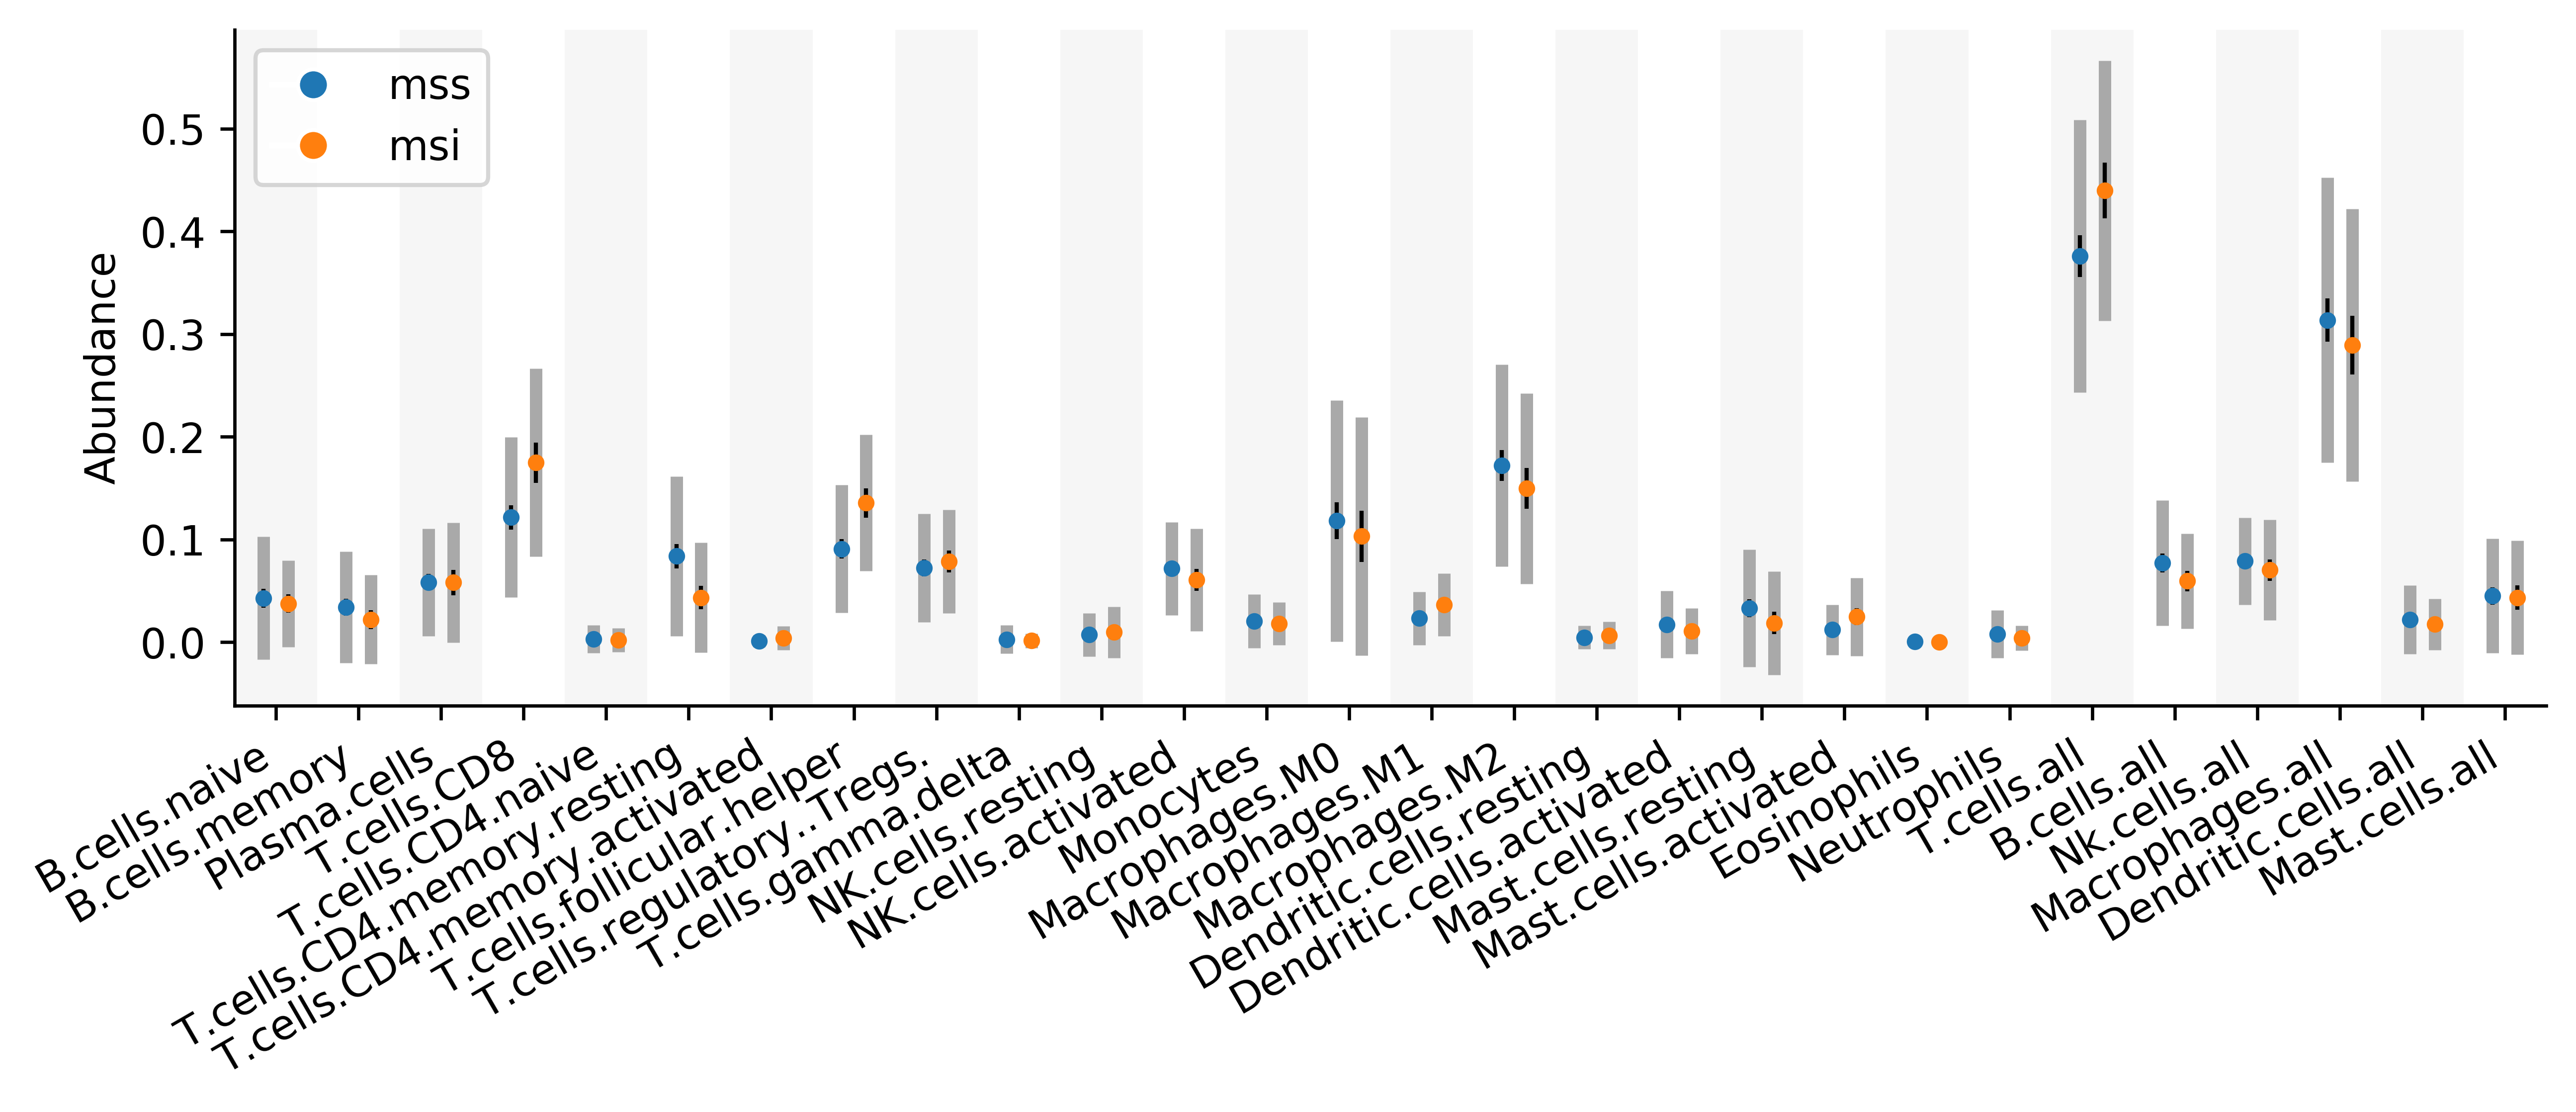

In [52]:
x_map = {v: i for i, v in enumerate(augmented_cell_types)}

offset_map = {
 'mss': -0.15,
 'msi': 0.15}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

color_map = {'mss': colors[0],
 'msi': colors[1]}

fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(1, 1, 1)

n = mss.shape[0];
mean = mss.mean(axis=0)
sd = mss.std(ddof=1, axis=0)
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * sd / np.sqrt(n)

x = [v + offset_map['mss'] for v in x_map.values()]
    
ax.errorbar(x, mean, yerr=sd, fmt='.', color = color_map['mss'], ecolor = 'darkgray', elinewidth=3.0)
ax.errorbar(x, mean, yerr=err, fmt="None", color = color_map['mss'], ecolor = 'black', elinewidth=1.0)

n = msi.shape[0];
mean = msi.mean(axis=0)
sd = msi.std(ddof=1, axis=0)
err = scipy.stats.t.ppf(1 - a / 2, n - 1) * sd / np.sqrt(n)

x = [v + offset_map['msi'] for v in x_map.values()]
    
ax.errorbar(x, mean, yerr=sd, fmt='.', color = color_map['msi'], ecolor = 'darkgray', elinewidth=3.0)
ax.errorbar(x, mean, yerr=err, fmt="None", color = color_map['msi'], ecolor = 'black', elinewidth=1.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

current_ylim = ax.get_ylim()
for v in x_map.values():
    if v % 2 == 0:
        ax.fill_between([v - 0.5, v + 0.5], current_ylim[0], current_ylim[1], facecolor='lightgray', alpha=0.2)

ax.set_ylim(current_ylim)
ax.set_xticks(list(x_map.values()))
ax.tick_params(axis='x', which = 'both', labelbottom=None)
ax.set_ylabel('Abundance')
ax.set_xlim(-0.5, len(x_map) - 0.5)
    
# Ticks
ax.tick_params(axis='x', which = 'both', labelbottom=True)
ax.set_xticks(list(x_map.values()))
ax.set_xticklabels(list(x_map.keys()), rotation=30, ha='right')

legend_elements = [mpl.lines.Line2D([0], [0], marker='.', color='w', markerfacecolor=color_map[i], label=i, markersize=15) 
                   for i in color_map]

ax.legend(handles=legend_elements, loc='upper left')

In [40]:
len(cell_types)

22